In [66]:
from timm.data import rand_augment_transform

aa_params = dict(
    translate_const=int(224 * 0.45),
    img_mean=tuple([min(255, round(255 * x)) for x in [0.5, 0.5, 0.5]]),
)

tf = rand_augment_transform('rand-m7-mstd0.5', aa_params)

ops = list()
print(tf.ops)
for op in tf.ops:
    print(op.name)
    ops.append(op.name)


[AugmentOp(name=AutoContrast, p=0.5, m=7, mstd=0.5), AugmentOp(name=Equalize, p=0.5, m=7, mstd=0.5), AugmentOp(name=Invert, p=0.5, m=7, mstd=0.5), AugmentOp(name=Rotate, p=0.5, m=7, mstd=0.5), AugmentOp(name=Posterize, p=0.5, m=7, mstd=0.5), AugmentOp(name=Solarize, p=0.5, m=7, mstd=0.5), AugmentOp(name=SolarizeAdd, p=0.5, m=7, mstd=0.5), AugmentOp(name=Color, p=0.5, m=7, mstd=0.5), AugmentOp(name=Contrast, p=0.5, m=7, mstd=0.5), AugmentOp(name=Brightness, p=0.5, m=7, mstd=0.5), AugmentOp(name=Sharpness, p=0.5, m=7, mstd=0.5), AugmentOp(name=ShearX, p=0.5, m=7, mstd=0.5), AugmentOp(name=ShearY, p=0.5, m=7, mstd=0.5), AugmentOp(name=TranslateXRel, p=0.5, m=7, mstd=0.5), AugmentOp(name=TranslateYRel, p=0.5, m=7, mstd=0.5)]
AutoContrast
Equalize
Invert
Rotate
Posterize
Solarize
SolarizeAdd
Color
Contrast
Brightness
Sharpness
ShearX
ShearY
TranslateXRel
TranslateYRel


Origin


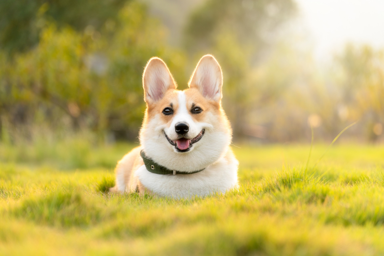

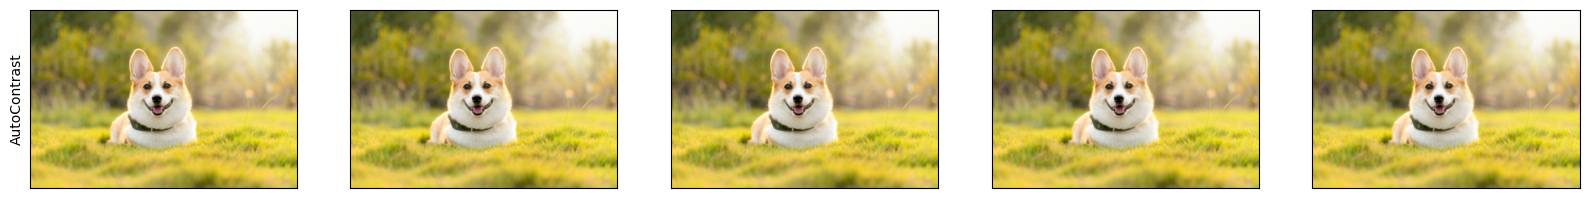

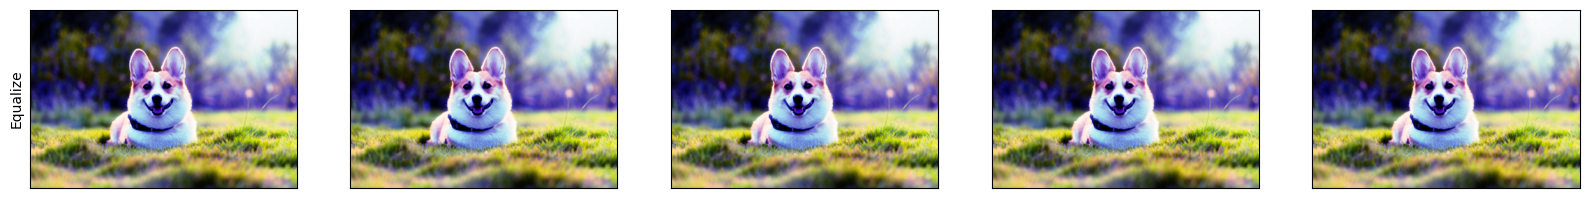

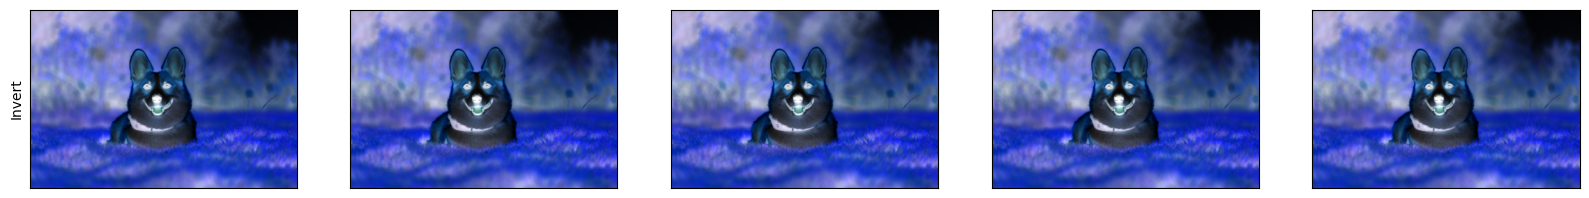

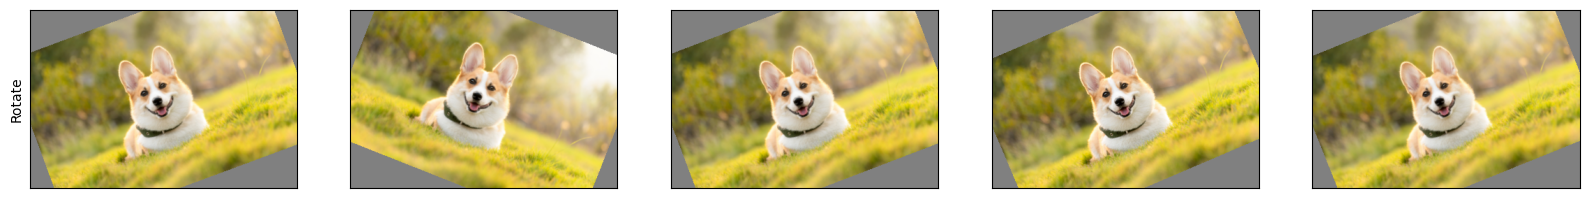

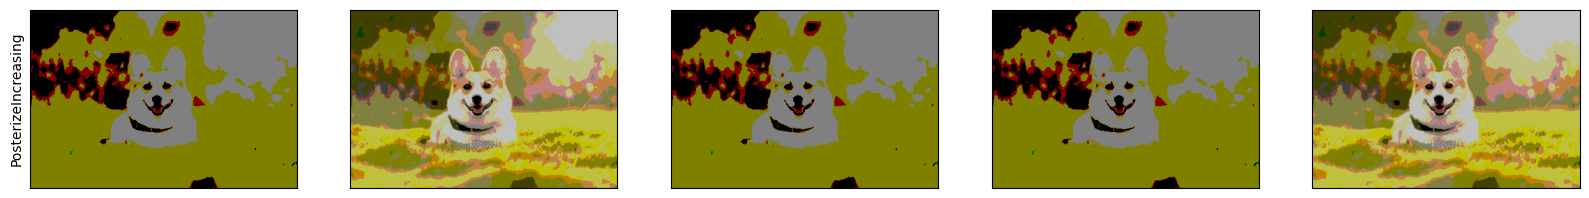

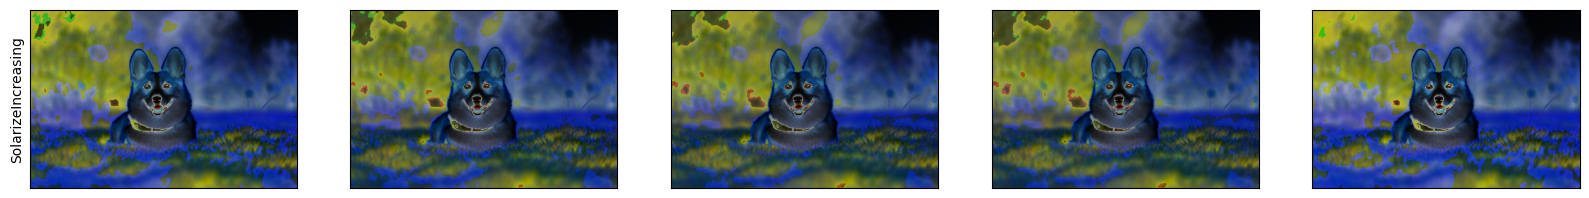

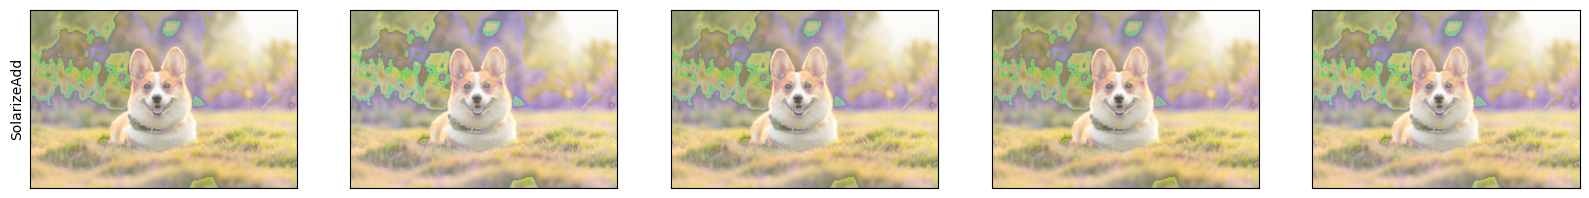

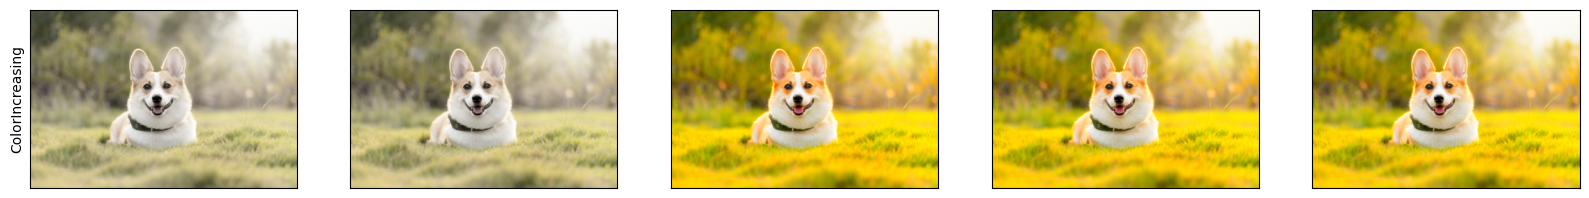

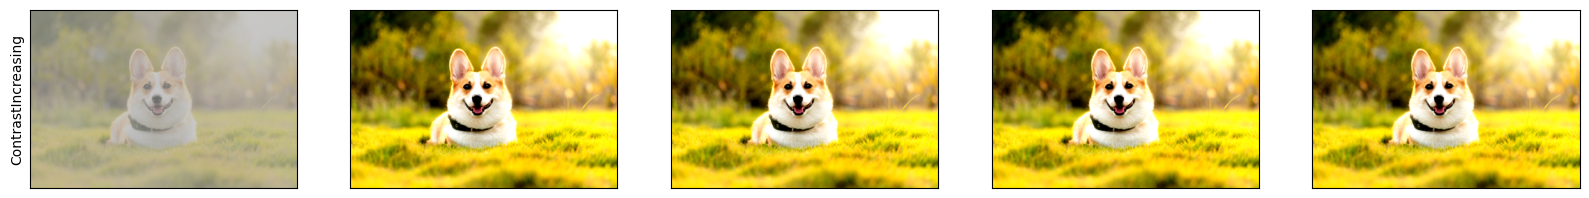

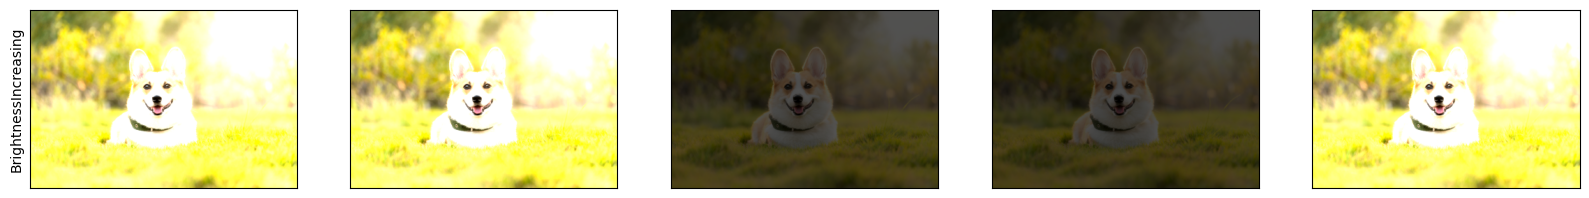

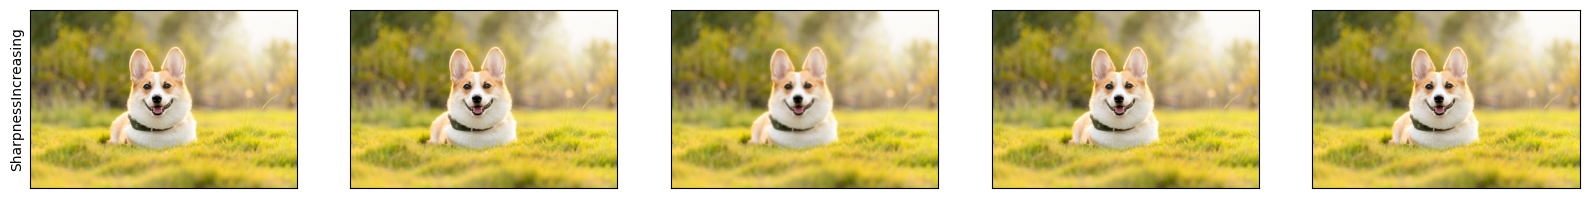

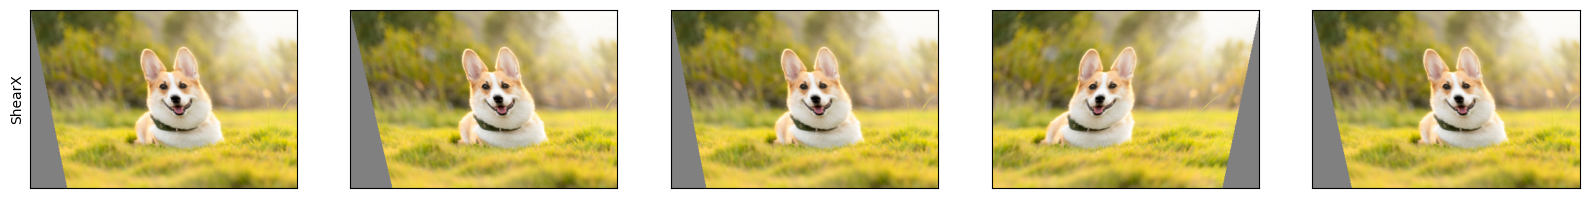

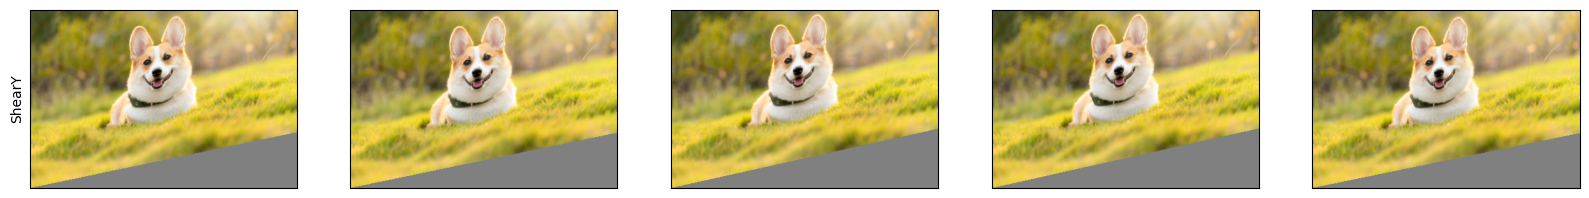

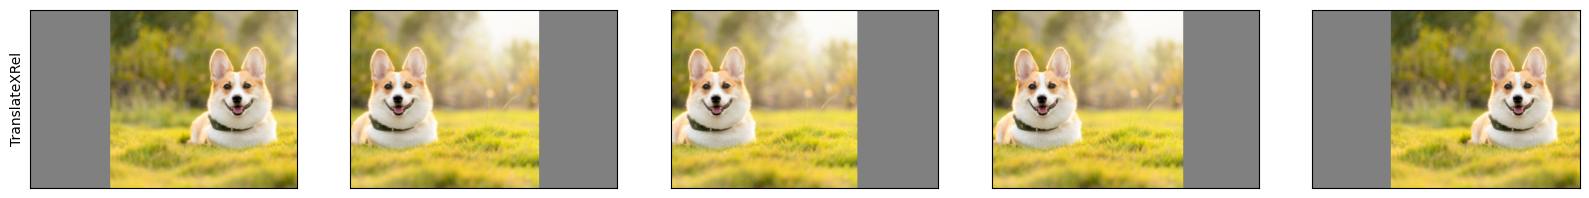

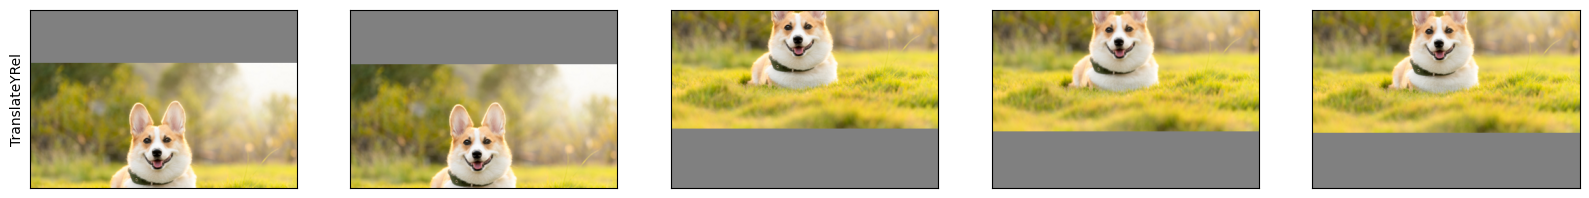

In [82]:
RAND_AUG_TRANSFORMS = {
    'AutoContrast': 'contrasted',
    'Equalize': 'histogram equalized',
    'Invert': 'color inverted',
    'Rotate': 'rotated',
    'PosterizeIncreasing': 'posterized',
    'SolarizeIncreasing': 'distorted',
    'SolarizeAdd': 'dark area lightened',
    'ColorIncreasing': 'color distorted',
    'ContrastIncreasing': 'contrast changed',
    'BrightnessIncreasing': 'brightness distorted',
    'SharpnessIncreasing': 'sharpness changed',
    'ShearX': 'distorted along horizontally',
    'ShearY': 'distorted along vertically',
    'TranslateXRel': 'horizontally shifted',
    'TranslateYRel': 'vertically shifted',
}

from timm.data.auto_augment import AugmentOp
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

img = Image.open('../../corgi.jpg').resize((192*2, 128*2))
print('Origin')
img.show()
for name in list(RAND_AUG_TRANSFORMS.keys()):
    plt.figure(figsize=(20, 10))

    columns = 5
    for i in range(columns):
        _img = AugmentOp(name, prob=1, magnitude=7, hparams={'magnitude_std': 0.5})(img)
        _img = np.array(_img)
        ax = plt.subplot(1, columns, i + 1)
        ax.tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)
        ax.set_ylabel(name) if i==0 else None
        plt.imshow(_img)

plt.show()

In [150]:
RAND_AUG_TRANSFORMS = {
    'AutoContrast': 'contrast',
    'Equalize': 'histogram equal',
    'Invert': 'color inverted',
    'Rotate': 'spin',
    'PosterizeIncreasing': 'poster',
    'SolarizeIncreasing': 'irregular',
    'SolarizeAdd': 'dark area lightening',
    'ColorIncreasing': 'color changed',
    'ContrastIncreasing': 'contrast changed',
    'BrightnessIncreasing': 'brightness changed',
    'SharpnessIncreasing': 'sharpness changed',
    'ShearX': 'twist out of shape along horizontal',
    'ShearY': 'twist out of shape along vertical',
    'TranslateXRel': 'horizontal shifted',
    'TranslateYRel': 'vertical shifted',
}

from src.models.clip.simple_tokenizer import SimpleTokenizer
from src.utils.registry import create_model
import src.models

tokenizer = create_model('CLIP_tokenizer')
_tokenizer = SimpleTokenizer()
# print(len(_tokenizer.decoder))
# 
# test_text = 'posterized'
# tokens = _tokenizer.encode(test_text)
# res = []
# for token in tokens:
#     res.append(_tokenizer.decode([token]))
# print(res)
    
for _, v in RAND_AUG_TRANSFORMS.items():
    tokens = tokenizer(v, context_length=14)
    
    res = []
    eos = tokens.tolist()[0].index(49407)
    for token in tokens.tolist()[0][1:eos]:
        res.append(_tokenizer.decode([token]))
    
    print(v)
    print(res)

contrast
['contrast ']
histogram equal
['histo', 'gram ', 'equal ']
color inverted
['color ', 'inverted ']
spin
['spin ']
poster
['poster ']
irregular
['irregular ']
dark area lightening
['dark ', 'area ', 'lightening ']
color changed
['color ', 'changed ']
contrast changed
['contrast ', 'changed ']
brightness changed
['brightness ', 'changed ']
sharpness changed
['sharp', 'ness ', 'changed ']
twist out of shape along horizontal
['twist ', 'out ', 'of ', 'shape ', 'along ', 'horizontal ']
twist out of shape along vertical
['twist ', 'out ', 'of ', 'shape ', 'along ', 'vertical ']
horizontal shifted
['horizontal ', 'shifted ']
vertical shifted
['vertical ', 'shifted ']
